# <h1 align="center">Empirical Methods GARCH and ARMA(1,1)</h1> 


# ARCH, GARCH, and Realized Variance

# From Kenneth Frenchís web page, download the monthly and daily returns to the investment (CMA) factor from 1963-07-01 to 2021-12-31. CMA is the last factor in the FF 5-factor model. Using the monthly return data:

### i). Estimate an ARMA(1,1) for the return series. Report the results. What is the estimated monthly persistence of expected returns to CMA? What is the half-life of the expected return series in months?



In [18]:
"""
Created on Sat Feb 12 09:22:58 2022

@author: Blacksheep, CFA

"""
# Importing libraries
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import scipy.stats as ss
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats, linalg
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from time import time
from datetime import timedelta
from statsmodels.tsa.stattools import ccovf
from statsmodels.regression.linear_model import RegressionResults
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA

file = r"C:\Users\user\Documents\F-F_Research_Data_5_Factors_2x3_daily.CSV"
file_monthly = r"C:\Users\user\Documents\F-F_Research_Data_5_Factors_2x3.csv"
#Cleaning Data
#I'm setting up the dateparse command and assigning it to dateparse variable which I will use in pythons built in function read_csv's parameter, date_parser.
dateparse = lambda x: pd.datetime.strptime(x,'%Y%m%d') 
# dateparse_monthly = lambda x: pd.datetime(x, "%Y%m")
# index_col is going to put your first column in the csv matrix as a dataframe.  I deleted csv rows i didn't need to make importing easier.
f_f_FF = pd.read_csv(file, index_col=0, parse_dates=True, date_parser = dateparse)

cma = pd.read_csv(file_monthly,index_col=0)[['CMA']] 
cma.index = pd.to_datetime(cma.index, format = '%Y%m')
arma = ARIMA(cma , order  =(1, 0 , 1 )).fit()

print(arma.summary())
print(f"Coefficients: {arma.params}\n.")



<ipython-input-18-538b4c117bf4>:33: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x,'%Y%m%d')
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                    CMA   No. Observations:                  701
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1466.717
Date:                Sat, 12 Feb 2022   AIC                           2941.434
Time:                        12:36:42   BIC                           2959.644
Sample:                    07-01-1963   HQIC                          2948.473
                         - 11-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2620      0.092      2.841      0.005       0.081       0.443
ar.L1          0.4822      0.169      2.854      0.004       0.151       0.813
ma.L1         -0.3749      0.181     -2.074      0.0

### ARMA(1,1) :
$$\mathbb{E(y_{t+1})} = \phi_{0} + \phi_{1}y_{t} + \theta_{1}y_{t} + \epsilon_{t}$$
### $$ \mathbb{E(y_{t+1})} = 0.262 + 0.48*y_{t} - 0.375y_{t} + 3.845$$

### ARIMA(1,1) Half life: 

###  $$h = \frac{\log(0.5)}{\log{(\phi_{1})}}$$

In [21]:
#ar(1) = ARIMA(1,1)
cma_half = np.log(0.5)/np.log(arma.params[1])
print(f'The ARMIA(1,1) half life is: {cma_half}\n')
print(f"Coefficients: {arma.params}\n.")

The ARMIA(1,1) half life is: 0.9502130305932202

Coefficients: const     0.261983
ar.L1     0.482167
ma.L1    -0.374880
sigma2    3.844848
dtype: float64
.


### ii). Estimate an ARCH(12) and a GARCH(1,1) process for the residuals from this ARMA(1,1). 

- Report the results and plot the time series of the conditional variance from each model on the same plot. 

- Are the estimated variance processes stationary?  

### Recall stationarity in GARCH(1,1) = $ \alpha_{1} + \beta_{1} < 1$ == Stationary Series. 
### We can use Box-jung to test ARCH(12) or check whether $0<\sum^{12}_{i=1}\phi_{i}<1$ holds. ==> Unconditional first and second moments must be constant for a series to be stationary.

Iteration:      1,   Func. Count:     15,   Neg. LLF: 1967.0762741384215
Iteration:      2,   Func. Count:     33,   Neg. LLF: 637056.6675857797
Iteration:      3,   Func. Count:     48,   Neg. LLF: 21119.414839710225
Iteration:      4,   Func. Count:     63,   Neg. LLF: 2767.7257404099882
Iteration:      5,   Func. Count:     78,   Neg. LLF: 2192.5590921096627
Iteration:      6,   Func. Count:     93,   Neg. LLF: 1549.3482555261442
Iteration:      7,   Func. Count:    108,   Neg. LLF: 1578.140377647221
Iteration:      8,   Func. Count:    123,   Neg. LLF: 1847.4787735021023
Iteration:      9,   Func. Count:    138,   Neg. LLF: 1513.983089015106
Iteration:     10,   Func. Count:    153,   Neg. LLF: 1449.9056071948278
Iteration:     11,   Func. Count:    169,   Neg. LLF: 1427.9186767978158
Iteration:     12,   Func. Count:    185,   Neg. LLF: 1472.2907820568335
Iteration:     13,   Func. Count:    200,   Neg. LLF: 1429.68270554511
Iteration:     14,   Func. Count:    215,   Neg. LLF: 14

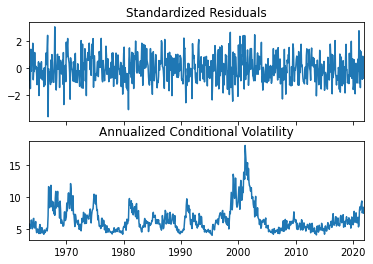

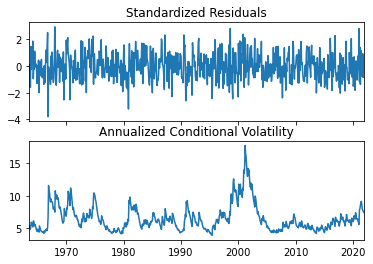

In [37]:
# ARCH(12) 
#Get resid from ARMA(1,1)
resid = arma.resid
am = arch_model(resid, mean='zero', p=12, q=0)
arch_12 = am.fit()
print(arch_12.summary())
 # Garch(1,1)
am = arch_model(resid, mean= 'zero')
garch_1_1 = am.fit()
print(garch_1_1.summary())
Arch_value = np.sum(arch_12.params) - arch_12.params[0]
Garch_value = garch_1_1.params[2] + garch_1_1.params[1]

fig = arch_12.plot(annualize = 'M')
fig = garch_1_1.plot(annualize = 'M')


print(f"The ARCH(12) stationary check value is: {Arch_value}.")
print(f"The GARCH(1,1) stationary check value is: {Garch_value}." )
print(f"Both processes are stationary.")


### iii). Plot the absolute values of the normalized residuals, $\eta_{t} = \epsilon_{t}\sigma_{t}$ , for each model on two separate plots. Using eyeball econometrics, do the models do a good job of accounting for clustering of volatility? Plot the autocorrelation functions of $|\eta_{t}|$

### Recall $\sigma^{2}_{t} = \alpha_{0} + \alpha_{1}\epsilon^{2}_{t-1} +$ . . . $ +   \epsilon^{2}_{t-12} $ for our ARCH model.

Text(0.5, 1.0, 'Garch (1,1)')

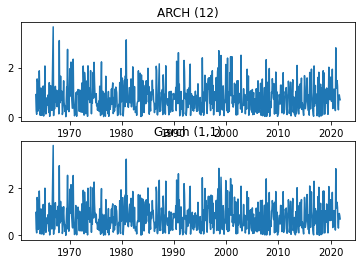

In [44]:
normalized_garch_eta = abs(garch_1_1.resid/garch_1_1.conditional_volatility)
normalized_arch_eta = abs(arch_12.resid/arch_12.conditional_volatility)

fix, axs = plt.subplots(2)
axs[0].plot(normalized_arch_eta)
axs[0].set_title('ARCH (12)')

axs[1].plot(normalized_garch_eta)
axs[1].set_title('Garch (1,1)')


In [45]:

# this is a Janky way to get the auto-correlation of this.
lags        = range(1,20)
acf_e_garch = pd.DataFrame(normalized_garch_eta).assign(**{f'{col} (t-{lag})': pd.DataFrame(normalized_garch_eta)[col].shift(lag)
    for lag in lags
    for col in pd.DataFrame(normalized_garch_eta)
}).corr().iloc[:,0]


In [49]:

# this is a Janky way to get the auto-correlation of this.
lags        = range(1,20)
acf_e_arch_12 = pd.DataFrame(normalized_arch_eta).assign(**{f'{col} (t-{lag})': pd.DataFrame(normalized_arch_eta)[col].shift(lag)
    for lag in lags
    for col in pd.DataFrame(normalized_arch_eta)
}).corr().iloc[:,0]

In [50]:
print(acf_e_garch)
print(acf_e_arch_12)

0           1.000000
0 (t-1)    -0.012399
0 (t-2)    -0.048687
0 (t-3)    -0.007176
0 (t-4)    -0.006811
0 (t-5)     0.006759
0 (t-6)     0.011109
0 (t-7)     0.009485
0 (t-8)     0.024577
0 (t-9)    -0.014526
0 (t-10)   -0.012493
0 (t-11)   -0.025650
0 (t-12)    0.030762
0 (t-13)    0.029065
0 (t-14)   -0.023608
0 (t-15)    0.040769
0 (t-16)    0.047374
0 (t-17)    0.035485
0 (t-18)   -0.077347
0 (t-19)    0.047184
Name: 0, dtype: float64
0           1.000000
0 (t-1)    -0.012399
0 (t-2)    -0.048687
0 (t-3)    -0.007176
0 (t-4)    -0.006811
0 (t-5)     0.006759
0 (t-6)     0.011109
0 (t-7)     0.009485
0 (t-8)     0.024577
0 (t-9)    -0.014526
0 (t-10)   -0.012493
0 (t-11)   -0.025650
0 (t-12)    0.030762
0 (t-13)    0.029065
0 (t-14)   -0.023608
0 (t-15)    0.040769
0 (t-16)    0.047374
0 (t-17)    0.035485
0 (t-18)   -0.077347
0 (t-19)    0.047184
Name: 0, dtype: float64


### iv). Using the daily data on CMA, estimate monthly realized variance for month t as

### $RV_{t} = \sum^{N_{t}}_{d=1}r^{2}_{t,d}$ where $r^{2}_{t,d}$ is the squared return of day d in month t and where $N_{t}$is the number of days in month t. Plot the resulting monthly time series of $RV_{t}$
.


In [59]:
dateparse = lambda x: pd.datetime.strptime(x,'%Y%m%d') 
df = pd.read_csv(file, index_col=0, parse_dates=True, date_parser = dateparse)[['CMA']]
cma_daily = df[['CMA']]
cma_daily.index.freq = cma_daily.index.inferred_freq
cma_daily['squared_rets'] = cma_daily['CMA']**2
cma_daily = cma_daily['squared_rets'].resample('M').sum()

<ipython-input-59-0ccd18f2aca9>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x,'%Y%m%d')


Text(0.5, 1.0, 'Monthly Vol')

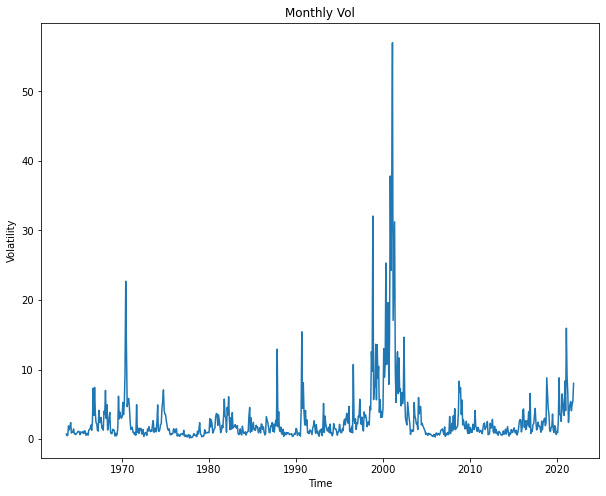

In [65]:
plt.figure(figsize=(10,8))
plt.plot(cma_daily)
plt.xlabel('Time')
plt.ylabel("Volatility")
plt.title("Monthly Vol")

### v)  What are the first order autocorrelations of $RV_{t}$ and $\epsilon_{t}$?

- ### What is the correlation between $RV_{t}$ and $\epsilon^{2}_{t}$ from the GARCH Model? What is the correlation between $RV_{t}$ and $\epsilon^{2}_{t}$

- ### What is the correlation between $RV_{t}$ and $\sigma^{2}_{t}$ from the GARCH model? What is the correlation of $\epsilon^{2}_{t}$ and $\sigma^{2}_{t}$ from GARCH?

In [66]:
# the rv is not a model, rather just a series so lets assume he's asking for ARIMA/ arma(1,1)
# Applying ARMA model on data_daily 
arma_daily = ARIMA(cma_daily, order = (1,0,1)).fit()
e_squared = arma_daily.resid**2
e_squared

date
1963-07-31     4.346574
1963-08-31     0.793625
1963-09-30     0.267825
1963-10-31     0.852301
1963-11-30     0.028295
                ...    
2021-07-31     0.689588
2021-08-31     0.496349
2021-09-30     0.480798
2021-10-31     0.886287
2021-11-30    10.537947
Freq: M, Length: 701, dtype: float64

In [106]:
# acf of rv_t and a squared residiual from some AR model
ACF_Lag1_RV = sm.tsa.acf(cma_daily ,nlags=1, fft=False)[1]
ACF_Lag1_esquared = sm.tsa.acf(e_squared, nlags=1, fft=False)[1]
# Correlation
np.corrcoef(cma_daily, e_squared)[0][1]

print("lag 1 autocorrelation")
print(f"ACF of the RV variable is: {ACF_Lag1_RV}")
print(f"ACF of the e^{2} variable is:  {ACF_Lag1_esquared}" )
print(f"Correlation between RV and e^2 is: {np.corrcoef(cma_daily, e_squared)[0][1]}")



lag 1 autocorrelation
ACF of the RV variable is: 0.683134731489323
ACF of the e^2 variable is:  0.31439782945837136
Correlation between RV and e^2 is: 0.7728069923336554


In [107]:
# Lest do Garch
#Implementing GARCH model on daily data
GARCH = arch_model(arma_daily.resid,mean="zero")
Garch_daily = GARCH.fit()
# fig = Garch_daily.plot(annualize="M")

# Lets pick up the condional square
Garch_variance = Garch_daily.resid**2
# Take Corr
corr = np.corrcoef(cma_daily, Garch_variance)
corr_resid_garch_square = np.corrcoef(Garch_variance, e_squared)

print("GARCH info ")
print(f"The correlation between the RV variable and conditional volatitlity square is: {corr[0][1]}")
print(f"The correlation between the arima residual and conditional volatitlity square is:  {corr_resid_garch_square[0][1]}" )


Iteration:      1,   Func. Count:      5,   Neg. LLF: 2257.912323793945
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1612.1059026365397
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1390.1110086628466
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1389.6946602924975
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1389.6364928383098
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1389.620319226649
Iteration:      7,   Func. Count:     37,   Neg. LLF: 1389.6128265177113
Iteration:      8,   Func. Count:     41,   Neg. LLF: 1389.6126171618666
Iteration:      9,   Func. Count:     45,   Neg. LLF: 1389.6126130473422
Iteration:     10,   Func. Count:     48,   Neg. LLF: 1389.6126115442394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1389.6126130473422
            Iterations: 10
            Function evaluations: 48
            Gradient evaluations: 10
GARCH info 
The correlation between the RV variable and condit

### iv) 

### Run an ARMA(1,1) on $RV_{t}$ assuming normally distributed errors (which strictly speaking can't be correct). Report the results. 


### Let $V_{t} = \mathbb{E_{t-1}}[RV_{t}]$ where the expectation is obtained from the estimated ARMA after a 30 day forecast? 

### What is the correlation between $v_{t}$ and $RV_{t}$? 
   Plot on the same graph the time series of $v_{t}$ and $\sigma_{t}$

In [88]:

arma_daily = ARIMA(cma_daily, order = (1,0,1)).fit()
print(arma_daily.summary())

                               SARIMAX Results                                
Dep. Variable:           squared_rets   No. Observations:                  701
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1758.106
Date:                Sat, 12 Feb 2022   AIC                           3524.212
Time:                        19:33:25   BIC                           3542.422
Sample:                    07-31-1963   HQIC                          3531.251
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8192      1.186      2.377      0.017       0.494       5.144
ar.L1          0.9227      0.008    110.200      0.000       0.906       0.939
ma.L1         -0.5063      0.017    -30.043      0.0

In [109]:
# take conditional expectation 30 steps out
v_t = arma_daily.forecast(steps = 30)
# USE rv sample. 
rv_sample =  cma_daily.iloc[::-1][0:30]
# USE rv sample. 
corr_rv_vt = np.corrcoef(v_t, rv_sample)[0][1]
print(f"The correlation between vt and rv_sample for 30 step forecast is: {corr_rv_vt}.")
#use volatility 

The correlation between vt and rv_sample for 30 step forecast is: 0.40523972766453276.


In [114]:
resid = arma_daily.resid
am = arch_model(resid, mean = 'zero')
garch_daily = am.fit()
garch_daily.conditional_volatility

Iteration:      1,   Func. Count:      5,   Neg. LLF: 2257.912323793945
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1612.1059026365397
Iteration:      3,   Func. Count:     21,   Neg. LLF: 1390.1110086628466
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1389.6946602924975
Iteration:      5,   Func. Count:     29,   Neg. LLF: 1389.6364928383098
Iteration:      6,   Func. Count:     33,   Neg. LLF: 1389.620319226649
Iteration:      7,   Func. Count:     37,   Neg. LLF: 1389.6128265177113
Iteration:      8,   Func. Count:     41,   Neg. LLF: 1389.6126171618666
Iteration:      9,   Func. Count:     45,   Neg. LLF: 1389.6126130473422
Iteration:     10,   Func. Count:     48,   Neg. LLF: 1389.6126115442394
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1389.6126130473422
            Iterations: 10
            Function evaluations: 48
            Gradient evaluations: 10


date
1963-07-31    1.154933
1963-08-31    1.683371
1963-09-30    1.558410
1963-10-31    1.406428
1963-11-30    1.384800
                ...   
2021-07-31    3.164392
2021-08-31    2.619591
2021-09-30    2.196883
2021-10-31    1.884687
2021-11-30    1.706187
Freq: M, Name: cond_vol, Length: 701, dtype: float64

Text(0.5, 1.0, 'Conditional forecast of ARMA(1,1)')

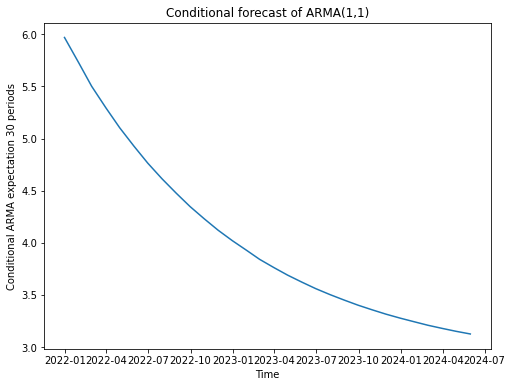

In [126]:
plt.figure(figsize=(8,6))
plt.plot(v_t)
plt.xlabel('Time')
plt.ylabel("Conditional ARMA expectation 30 periods")
plt.title("Conditional forecast of ARMA(1,1)")


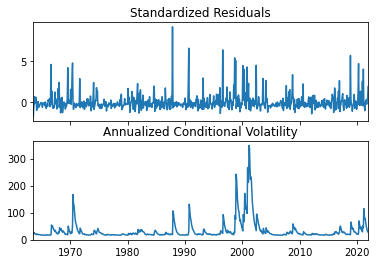

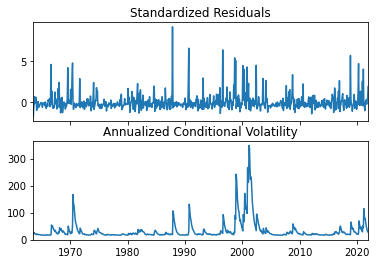

In [117]:
garch_daily.plot(annualize='D')